# *FASE 1: EXPLORACIÓN Y LIMPIEZA* 

##### IMPORTACIONES

In [59]:
# Librerías para el tratamiento de datos
import pandas as pd
import numpy as np

# Librerías de visualización (necesarias para la FASE 2)
import seaborn as sns
import matplotlib.pyplot as plt

# Librería para la imputación de nulos
from sklearn.impute import SimpleImputer

# Para una mejor viualización de tidas las columnas
pd.set_option('display.max_columns', None)

## 1.1. EXPLORACIÓN INICIAL 


### REVISIÓN Y ANÁLISIS DE LOS DATOS DE LOS CSV 

In [3]:
# Lectura de los datos del primer CSV y creación del Data Frame correspondiente
df_flight = pd.read_csv('Customer Flight Activity.csv')
#Revisamos las dos primeras filas para ver la info de las columnas sin necesidad de cargar todo el DF
df_flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [4]:
# Reviso la forma de mi DF (cuántas filas y columnas tiene)
print(df_flight.shape)
print(f"El número de filas que tenemos es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

(405624, 10)
El número de filas que tenemos es 405624, y el número de columnas es 10


In [5]:
# Revisamos el número total de valores del DF
print(f'El archivo CSV "Customer Flight Activity" tiene un total de {df_flight.size} valores.')


El archivo CSV "Customer Flight Activity" tiene un total de 4056240 valores.


In [6]:
# Ver dos filas al azar
df_flight.sample(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
26899,631661,2017,2,7,0,7,2261,226.0,0,0
140183,366911,2017,9,15,0,15,2055,205.0,0,0


In [7]:
#Reviso las dos últimas filas
df_flight.tail(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [8]:
#Reviso el nombre de todas las columnas del DF
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [9]:
# Reviso los principales datos estadísticos del DF
df_flight.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [10]:
# Transponemos los resultados para visualizar los datos en función de los datos estadísticos
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [11]:
# Lectura de los datos del segundo CSV y creación del Data Frame correspondiente
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

df_loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [12]:
# Reviso la forma del CSV
print(f'La forma de mi data frame es la siguiente: {df_loyalty.shape}')


La forma de mi data frame es la siguiente: (16737, 16)


Obervamos que este DF tiene el muchísimas menos filas que el anterior DF pero tiene más columnas.

In [13]:
# Revisamos el número total de valores del DF
print(f'El archivo CSV "Customer Loyalty History" tiene un total de {df_loyalty.size} valores.')

El archivo CSV "Customer Loyalty History" tiene un total de 267792 valores.


In [14]:
# Reviso 10 filas al azar
df_loyalty.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
7934,845176,Canada,British Columbia,Whistler,V6T 1Y8,Male,College,NaN,Divorced,Nova,8007.40,Standard,2014,11,NaN,NaN
10728,139532,Canada,British Columbia,Vancouver,V1E 4R6,Male,High School or Below,72896.0,Divorced,Star,2491.26,Standard,2015,5,NaN,NaN
14903,285074,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,50636.0,Married,Star,8058.66,Standard,2018,7,NaN,NaN
11779,136065,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,83015.0,Married,Star,2731.52,Standard,2012,7,NaN,NaN
1860,646756,Canada,Quebec,Montreal,H3T 8L4,Female,Bachelor,79178.0,Married,Aurora,6883.67,Standard,2018,10,NaN,NaN
9754,187876,Canada,Ontario,Toronto,M2M 6J7,Male,Bachelor,46607.0,Married,Nova,34611.38,Standard,2018,8,NaN,NaN
1754,934893,Canada,Alberta,Peace River,T9O 2W2,Male,High School or Below,60347.0,Married,Aurora,6618.02,Standard,2013,10,NaN,NaN
1386,427329,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,81031.0,Married,Aurora,5681.31,Standard,2017,1,NaN,NaN
4736,230560,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Divorced,Star,8231.22,2018 Promotion,2018,2,NaN,NaN
4738,783363,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,99335.0,Married,Nova,3086.72,Standard,2017,9,NaN,NaN


In [15]:
#Reviso las dos últimas filas
df_loyalty.tail(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [16]:
# No aparecen todas las columnas pues al devolvernos datos estadísticos, nos muestra sólo aquellas con valores numéricos
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [17]:
# Revisamos ahora los datos estadísitcos de las variables categóricas indicándole dicho filtro
df_loyalty.describe(include='object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [18]:
# Vamos a revisar los valores únicos de la columna EDUCATION, LOYALTY CARD y ENROLLMENT TYPE
print(f'Las opciones de la variable Education son: {df_loyalty["Education"].unique()}.')
print(f'Las opciones de la variable Loyalty card son: {df_loyalty["Loyalty Card"].unique()}.')
print(f'Las opciones de la variable Enrollment type son: {df_loyalty["Enrollment Type"].unique()}.')



Las opciones de la variable Education son: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'].
Las opciones de la variable Loyalty card son: ['Star' 'Aurora' 'Nova'].
Las opciones de la variable Enrollment type son: ['Standard' '2018 Promotion'].


In [20]:
# Revisamos la frecuencia de cada valor de la variable EDUCATION (información que nos vendrá bien más adelante) 
df_loyalty['Education'].value_counts()

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

In [21]:
# Para revisar valores únicos y sus frecuencias de todas las variables categóricas usamos un bucle for. Para hacer más sencillo el uso del bucle,
# voy a realizar antes algunos ajustes. Selecciono todas las variables categóricas y lo añado en una nueva variable para poder trabajar mejor
df_loyalty_cat = df_loyalty.select_dtypes(include='object')
df_loyalty_cat.head(2)

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard
1,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,Standard


In [22]:
# Elimino las columnas que no son de mi interés usando el método '.drop()', en este caso la columna del CP
df_loyalty_cat_drop = df_loyalty_cat.drop('Postal Code', axis=1, inplace=False)
df_loyalty_cat_drop


,Country,Province,City,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Ontario,Toronto,Female,Bachelor,Married,Star,Standard
1,Canada,Alberta,Edmonton,Male,College,Divorced,Star,Standard
2,Canada,British Columbia,Vancouver,Male,College,Single,Star,Standard
3,Canada,Ontario,Toronto,Male,College,Single,Star,Standard
4,Canada,Quebec,Hull,Male,Bachelor,Married,Star,Standard
...,...,...,...,...,...,...,...,...
16732,Canada,British Columbia,Vancouver,Female,College,Married,Star,Standard
16733,Canada,Saskatchewan,Regina,Female,Bachelor,Married,Star,Standard
16734,Canada,British Columbia,Vancouver,Male,College,Single,Star,Standard
16735,Canada,Yukon,Whitehorse,Male,Bachelor,Married,Star,2018 Promotion


In [23]:
# Para utilizar unique() y value_counts() en un bucle for, crearé primero una variable con las columnas del DF
columnas_cat = df_loyalty_cat_drop.columns
print(f"Las columnas del DataFrame de variables categóricas son {columnas_cat}")

Las columnas del DataFrame de variables categóricas son Index(['Country', 'Province', 'City', 'Gender', 'Education', 'Marital Status',
       'Loyalty Card', 'Enrollment Type'],
      dtype='object')


In [24]:
# Con el bucle for, iteramos por cada una de las columnas para, ahora sí, sacar sus valores únicos y sus frecuencias

for columna in columnas_cat:
    resultado_u = df_loyalty_cat_drop[columna].unique()
    resultado_c = df_loyalty_cat_drop[columna].value_counts()
    print(f"Columna: {columna}")
    print(f"Valores únicos: {resultado_u}")
    print(f"Frecuencias de dichos valores: \n{resultado_c}\n")

Columna: Country
Valores únicos: ['Canada']
Frecuencias de dichos valores: 
Country
Canada    16737
Name: count, dtype: int64

Columna: Province
Valores únicos: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Frecuencias de dichos valores: 
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

Columna: City
Valores únicos: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "

### REVISIÓN DE VALORES NULOS 

In [25]:
# Revisamos en qué columnas del DF Flight hay valores nulos 
df_flight.isnull().sum()

#Podríamos usuar también el método '.isna()' de Pandas para hallar los nulos


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [26]:
# Entre otra info, vemos el total de datos NO NULOS
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


Hemos confirmado (dos veces) que el CSV Flight no contiene datos nulos.

In [27]:
# Revisamos en qué columnas del DF Flight hay valores nulos. Esta vez usaremos '.isna()' 
df_loyalty.isna().sum()


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [387]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

Como podemos ver, tanto la función '.isna()' como 'isnull()' de pandas, realizan la misma función sobre un DF o Serie.
Respecto a los resultados, mientras que el DF Flight no tiene nulos, el DF Loyalty tiene nulos en tres columnas. Vamos a profundizar un poco más.

In [28]:
# Tenemos nulos en el DF Loyalty en las columnas: Salary, Cancellation Year y Cancellation Month.

# Podemos calcular el porcentaje de nulos que tenemos para cada columna.
porc_nulos = (df_loyalty.isnull().sum() / df_loyalty.shape[0]) * 100
porc_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [389]:
# Quiero ver el número total de valores (en el DF y en cada columna) además de los pocentajes
# Calculo el número total de valores en la columna 'Salary', en ambas columnas Cancellation así como en todo el DF
total_valores_df = df_loyalty.size
total_valores_salario = df_loyalty['Salary'].size
total_valores_cancelacion = df_loyalty['Cancellation Month'].size

# Calculo el número total de valores nulos en la columna 'Salary', en ambas columnas Cancellation así como en todo el DF
total_nulos_df = df_loyalty.isnull().sum().sum()
total_nulos_salario = df_loyalty['Salary'].isnull().sum()
total_nulos_cancelacion = df_loyalty['Cancellation Month'].isnull().sum()

# Calculo el porcentaje de valores nulos en la columna 'Salary', en ambas columnas Cancellation así como en todo el DF
porcentaje_nulos_df = (total_nulos_df / total_valores_df) * 100
porcentaje_nulos_salary = (total_nulos_salario / total_valores_salario) * 100
porcentaje_nulos_cancelacion = (total_nulos_cancelacion / total_valores_cancelacion) * 100

print(f'El total de valores nulos en todo el DF es de {total_nulos_df}, es decir, el porcentaje de nulos en todo el DF es del {porcentaje_nulos_df.round()}')
print(f'El número total de valores de la columna Salary es de {total_valores_salario} y de las columnas Cancellation (year,month) también es de {total_valores_cancelacion}')
print(f'El total de valores nulos en la columna Salary es de {total_nulos_salario}, es decir, el porcentaje es del {porcentaje_nulos_salary.round()}')
print(f'El total de valores nulos en cada columna Cancellation (month, year) es de {total_nulos_cancelacion}, es decir, el porcentaje es del {porcentaje_nulos_cancelacion.round()}')


El total de valores nulos en todo el DF es de 33578, es decir, el porcentaje de nulos en todo el DF es del 13.0
El número total de valores de la columna Salary es de 16737 y de las columnas Cancellation (year,month) también es de 16737
El total de valores nulos en la columna Salary es de 4238, es decir, el porcentaje es del 25.0
El total de valores nulos en cada columna Cancellation (month, year) es de 14670, es decir, el porcentaje es del 88.0


##### Observo que los datos nulos en las columnas 'Cancellation' son las personas que no han cancelado, es decir, actuales clientes. Respecto a los nulos en 'Salary', tendré que hacer un estudio más exhaustivo.

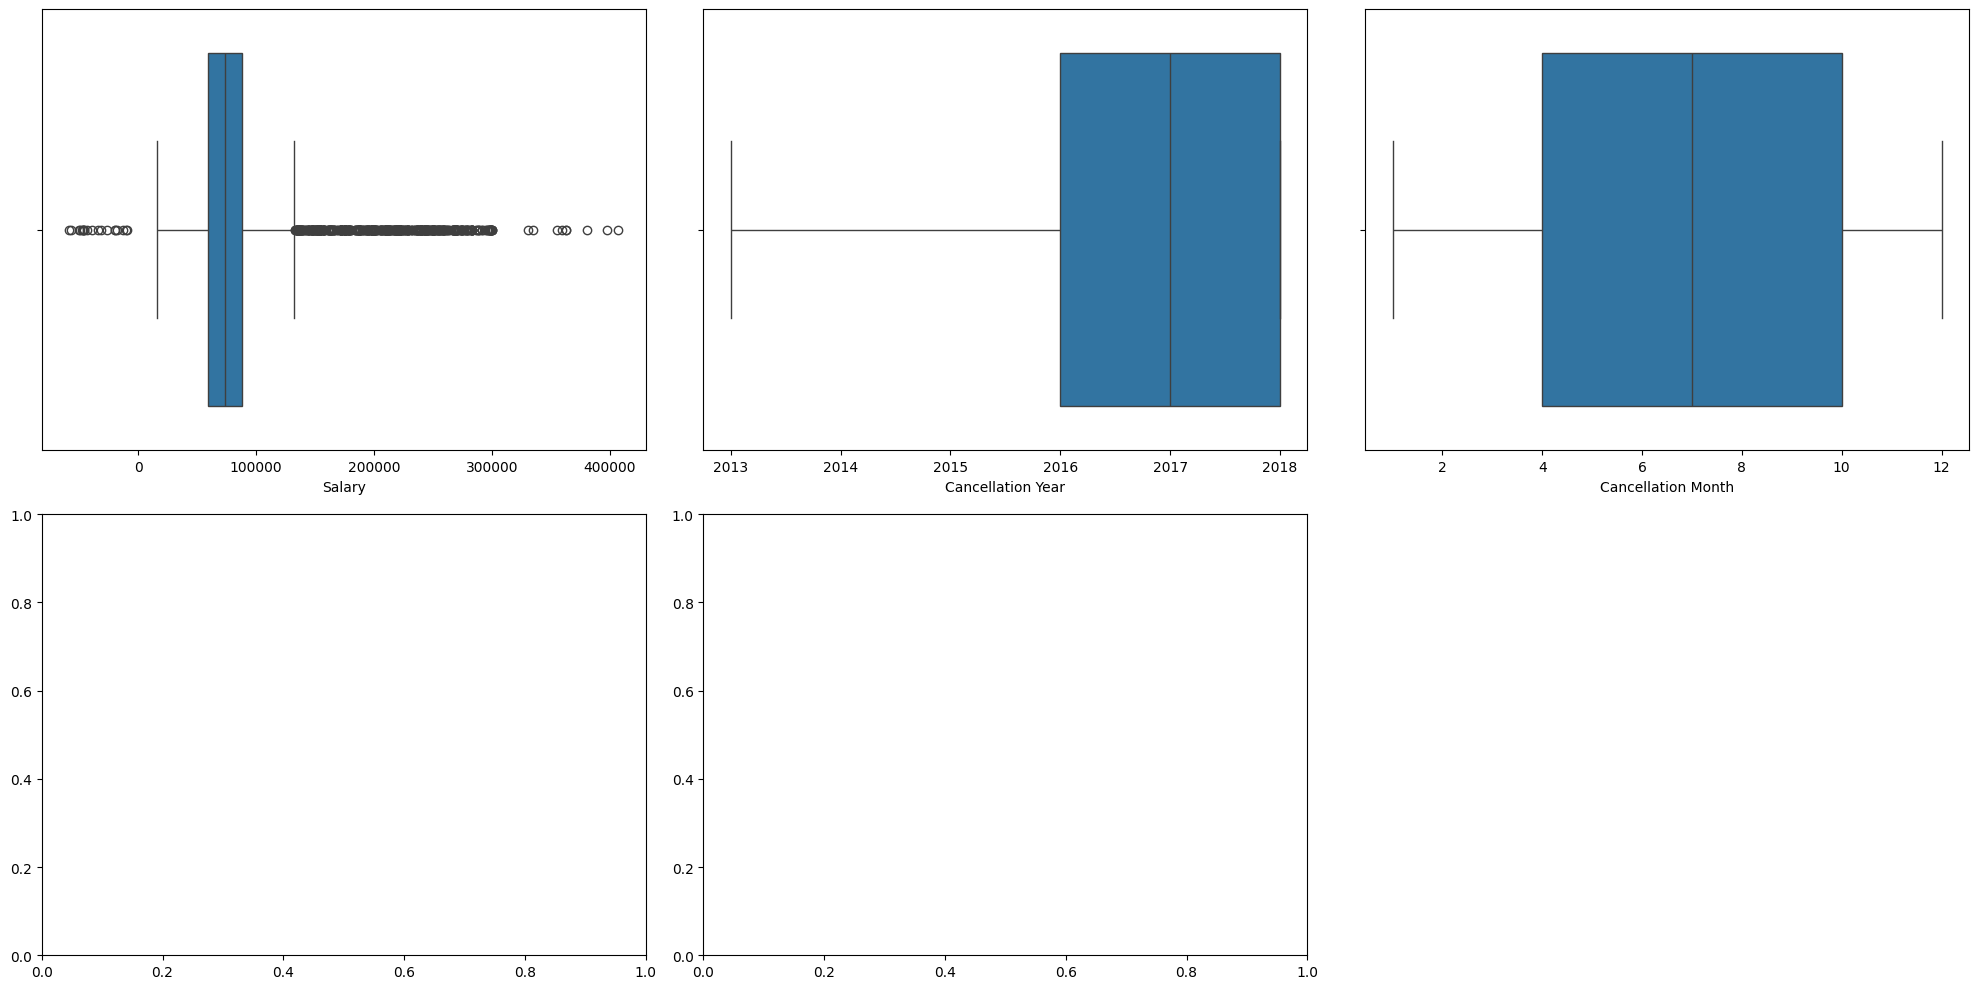

In [30]:
# Para ver valores atípicos u Outliers en las columnas donde tenemos nulos (sin visualización)

nulos_esta_num = df_loyalty[df_loyalty.columns[df_loyalty.isnull().any()]].select_dtypes(include = np.number).columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df_loyalty, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);


##### Como podemos ver, en la columna 'Salary' hay muchos valores atípicos. Cuando vayamos a gestionar los nulos, tendremos que ver si estos valores son reales o se trata de un posible error #####

### REVISIÓN DE VALORES DUPLICADOS ###

In [32]:
# Reviso los valores duplicados con la función '.duplicated()', la cual devuelve valores booleanos de todo el DF. Hago sumatorio
print(f'El número todal de valores duplicados en el CSV Flight es de {df_flight.duplicated().sum()}')

El número todal de valores duplicados en el CSV Flight es de 1864


In [33]:
# ¿En qué filas/columnas tenemos los datos duplicados?
df_flight_dup = df_flight[df_flight.duplicated()]
df_flight_dup


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


Observo que existen duplicados en la columna Loyalty Number, lo cual deseo revisar en profundidad pues se trata de un identificador único para cada cliente.


In [34]:
# Reviso un poco más los duplicados de la columna, es decir, que valores se repiten y cuantas veces. 

loyalty_numbers_dup = df_flight['Loyalty Number'].value_counts()
loyalty_numbers_dup


Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

Continúo con la revisión, quiero inspeccionar las filas con valores de Loyalty Number duplicadas para ver si es correcto o si son filas completas duplicadas.


In [35]:
# Filtro las filas que tienen Loyalty Number duplicados
duplicated_rows = df_flight[df_flight['Loyalty Number'].isin(loyalty_numbers_dup.index)]

# Ordeno las filas duplicadas por Loyalty Number para estudiarlo mejor
duplicated_rows_sorted = duplicated_rows.sort_values(by='Loyalty Number')
print(duplicated_rows_sorted)

        Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0               100018  2017      1               3                        0   
388723          100018  2018     12              17                        6   
185911          100018  2017     12               6                        0   
101406          100018  2017      7              10                        0   
287317          100018  2018      6               0                        0   
...                ...   ...    ...             ...                      ...   
304217          999986  2018      6               0                        0   
321118          999986  2018      7              15                        0   
354920          999986  2018      9               0                        0   
185910          999986  2017     11               0                        0   
405623          999986  2018     12               0                        0   

        Total Flights  Distance  Points

Compruebo que se repite el Loyalty number puesto que algunes clientes han volado en diferentes años y meses, no son filas duplicadas por error.

In [36]:
# Reviso los valores duplicados del DF Lotaly, y hago sumatorio
print(f'El número todal de valores duplicados en el CSV Loyalty es de {df_loyalty.duplicated().sum()}')


El número todal de valores duplicados en el CSV Loyalty es de 0


### UNIÓN DE LOS DATA FRAME 

Debido a que poseemos una columna en común en ambos DF (Loyalty Number, Identificador único del cliente dentro del programa de lealtad), vamos a usar el método 'merge()'.

In [37]:
# Primero recordemos como son nuestros DFs
df_flight.head(2)



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [397]:
df_loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [38]:
# Unión de los DFs con 'merge/outer pues deseo que me devuelva todos los valores (comunes y no comunes)
df_union = df_loyalty.merge(df_flight, how='outer', on='Loyalty Number')
df_union.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0


# -----------------------------------------------------------------------------

## 1.2. LIMPIEZA DE DATOS ##

### VERIFICACIÓN DE LA CONSITENCIA Y CORRECIÓN DE LOS DATOS 

##### Respecto a la limpieza del formato tanto de nombres de columnas como de los valores, nuestro DF es homogéneo por lo que no realizaré nigún cambio. 

##### Recordemos que los datos nulos tan solo aparecían en el DF Loyalty en las columnas: Salary, Cancellation Year y Cancellation Month. Tras revisar los procesos de estudio y visualización de datos que debo realizar tras la limpieza, observo que las columnas Cancellation Year y Cancellation Month no las voy a necesitar, por lo que las eliminaré (tal y como hice con la columna Postal Code para trabajar mejor) creando un nuevo DF. 

##### Tener un DF más manejable me ayudará en la verificación y corrección de los datos. El tratamiento de los nulos, lo realizaré en el siguiente punto después de dicha limpieza previa.

In [40]:
# Eliminación de columnas que contienen nulos y que no voy a necesitar
df_union_clean3 = df_union.drop(df_union[['Cancellation Year', 'Cancellation Month']], axis=1, inplace=False)
df_union_clean3

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2017,2,2,2,4,1320,132.0,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2018,10,6,4,10,3110,311.0,385,31
3,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2017,4,4,0,4,924,92.0,0,0
4,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2017,5,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,2018,7,15,0,15,1995,199.0,0,0
405620,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,2018,9,0,0,0,0,0.0,0,0
405621,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,2018,10,6,0,6,708,70.0,0,0
405622,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,2018,11,11,4,15,2040,204.0,0,0


Revisando la tabla, veo que todavía hay información innecesaria para nuestro trabajo de análisis, por lo que vamos a prescindir de ella para tener un DF más limpio y que se vea más clara la información. 

In [41]:
# Variables que sí necesito: Loyalty Number, Province, Gender, Education, Salary, Marital Status, Loyalty Card, Year, Month, Flights Booked, 
# Distance, Points Accumulated
# Elimnaré nuevamente la columna 'Postal Code' pues no guardé la eliminación anterior, la realicé tan sólo para trabajar mejor en ese momento.
df_union_clean2 = df_union_clean3.drop(df_union[['Postal Code','Country', 'City', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Flights with Companions', 'Points Redeemed', 'Dollar Cost Points Redeemed']], axis=1, inplace=False)
df_union_clean2.head(2)

,Loyalty Number,Province,Gender,Education,Salary,Marital Status,Loyalty Card,Year,Month,Flights Booked,Total Flights,Distance,Points Accumulated
0,100018,Alberta,Female,Bachelor,92552.0,Married,Aurora,2017,1,3,3,1521,152.0
1,100018,Alberta,Female,Bachelor,92552.0,Married,Aurora,2017,2,2,4,1320,132.0


In [42]:
# Reviso el DF resultado de la unión y limpieza de columnas
df_union_clean2.sample(10)

,Loyalty Number,Province,Gender,Education,Salary,Marital Status,Loyalty Card,Year,Month,Flights Booked,Total Flights,Distance,Points Accumulated
245061,642976,Ontario,Male,Bachelor,53620.0,Single,Nova,2018,10,0,0,0,0.00
313080,792418,British Columbia,Female,Bachelor,55338.0,Single,Nova,2017,1,6,9,3069,306.00
87248,295412,Quebec,Female,Bachelor,84988.0,Married,Aurora,2017,11,0,0,0,0.00
186354,513246,Ontario,Male,Bachelor,53176.0,Married,Nova,2018,8,0,0,0,0.00
176976,492505,Ontario,Male,Bachelor,69483.0,Divorced,Aurora,2017,2,0,0,0,0.00
195091,533742,Ontario,Male,Bachelor,48567.0,Married,Star,2018,5,8,8,904,90.00
152055,438526,Quebec,Male,College,NaN,Single,Nova,2018,3,3,3,1077,133.75
32418,172345,Quebec,Male,Bachelor,57311.0,Married,Nova,2018,7,0,0,0,0.00
163075,463230,Yukon,Male,College,NaN,Divorced,Nova,2018,8,0,0,0,0.00
133938,399678,British Columbia,Female,High School or Below,70825.0,Married,Star,2018,7,7,14,3150,315.00


In [43]:
# Revisaré los datos estadísticos
df_union_clean2.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Salary,302952.0,79268.825953,34992.133508,-58486.0,59262.00,73479.0,88612.00,407228.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5


Cómo podemos observar, la columna Salary tiene un valor mínimo negativo, lo cual no es posible porque estamos revisando el salario que perciben les clientes, por lo que deduzco que debe ser un error. 

In [44]:
# Reviso los números negativos existentes

columna_s = df_union_clean2['Salary']
contador = 0
for num in columna_s:
    if num < 0:
            # si encuentra valor; lo paso a número y lo pinto soi es negativo
        contador += 1
        print(num)

print(f"Número de valores negativos en 'Salary': {contador}")

-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-10605.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-58486.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-31911.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-49001.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-46683.0
-

Voy a transformar los 480 números negativos en postivos usando el método 'np.where'. No puedo usar la función 'abs() debido a la presencia de los valores nulos


In [46]:
# Multiplico los números negativos por -1 para convertirlos en positivo
#Hago una copia por si más adelante decido que este método no es correcto
df_union_clean2_pos = df_union_clean2.copy() 
df_union_clean2_pos['Salary'] = np.where(df_union_clean2_pos['Salary'] < 0, df_union_clean2_pos['Salary']*-1, df_union_clean2_pos['Salary'])


In [47]:
# Comprobación de la conversión:
columna_s2 = df_union_clean2_pos['Salary']
contador = 0
for num in columna_s2:
    if num < 0:
            # si encuentra valor; lo paso a número y lo pinto soi es negativo
        contador += 1
        print(num)

print(f"Número de valores negativos en 'Salary': {contador}")

Número de valores negativos en 'Salary': 0


In [48]:
# Revisamos los nuevos valores estadísticos
df_union_clean2_pos.describe().T 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Salary,302952.0,79381.440228,34735.904533,9081.0,59262.00,73479.0,88612.00,407228.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5


In [49]:
# Comparo los datos con el DF sin convertir
df_union_clean2.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Salary,302952.0,79268.825953,34992.133508,-58486.0,59262.00,73479.0,88612.00,407228.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5


Respecto a la columna 'Salary' podemos observar lo siguiente:
- La desviación estándar y la media a penas han cambiado. 
- El valor mínimo ha tenido un gran cambio debido a la conversión de los valores negativos.


In [55]:
# Reviso las medidas de cetralización
media_salario = df_union_clean2_pos['Salary'].mean() # La tenemos arriba pero quiero ver las 3 cifras juntas
moda_salario = df_union_clean2_pos['Salary'].mode()[0]
mediana_salario = df_union_clean2_pos['Salary'].median()

# Redondeo las decimales
print(f'La media del DF es: {media_salario.round()}')
print(f'La moda del DF es: {moda_salario.round()}')
print(f'La mediana del DF es: {mediana_salario.round()}')

La media del DF es: 79381.0
La moda del DF es: 101933.0
La mediana del DF es: 73479.0


### TRATAMIENTO DE LOS DATOS NULOS

In [57]:
# Reviso nuevamente los nulos tras mi limpieza para verificar que sólo hay nulos en la columna 'Salary'
df_union_clean2_pos.isnull().sum()

Loyalty Number             0
Province                   0
Gender                     0
Education                  0
Salary                102672
Marital Status             0
Loyalty Card               0
Year                       0
Month                      0
Flights Booked             0
Total Flights              0
Distance                   0
Points Accumulated         0
dtype: int64

In [409]:
df_union_clean2_pos.notnull().sum()

Loyalty Number        405624
Province              405624
Gender                405624
Education             405624
Salary                302952
Marital Status        405624
Loyalty Card          405624
Year                  405624
Month                 405624
Flights Booked        405624
Total Flights         405624
Distance              405624
Points Accumulated    405624
dtype: int64

In [58]:
# Calculo el número total de valores en todo el DF y en la columna 'Salary' 
total_valores_df_c2 = df_union_clean2_pos.size
total_valores_salario_c2 = df_union_clean2_pos['Salary'].size

# Calculo el número total de valores nulos en todo el DF y en la columna 'Salary'
total_nulos_df_c2 = df_union_clean2_pos.isnull().sum().sum()
total_nulos_salario_c2 = df_union_clean2_pos['Salary'].isnull().sum()


# Calculo el porcentaje de valores nulos en la columna 'Salary', en ambas columnas Cancellation así como en todo el DF
porcentaje_nulos_df_c2 = (total_nulos_df_c2 / total_valores_df_c2) * 100
porcentaje_nulos_salario_c2 = (total_nulos_salario_c2 / total_valores_salario_c2) * 100

print(f'El número total de valores del DF es de {total_valores_df_c2}')
print(f'El número total de valores de la columna Salary es de {total_valores_salario_c2}')
print(f'El total de valores nulos en todo el DF es de {total_nulos_df_c2}, es decir, el porcentaje de nulos en todo el DF es del {porcentaje_nulos_df_c2.round()}%')
print(f'El total de valores nulos en la columna Salary es de {total_nulos_salario_c2}, es decir, el porcentaje de nulos respecto al total de valores solo en la columna Salary es del {porcentaje_nulos_salario_c2.round()}%')
print(f'El total de valores nulos del DF ({total_nulos_df_c2}) debe ser igual al total de nulos de la columna Salary ({total_nulos_salario_c2}) pues hemos eliminado las otras columnas con nulos')


El número total de valores del DF es de 5273112
El número total de valores de la columna Salary es de 405624
El total de valores nulos en todo el DF es de 102672, es decir, el porcentaje de nulos en todo el DF es del 2.0%
El total de valores nulos en la columna Salary es de 102672, es decir, el porcentaje de nulos respecto al total de valores solo en la columna Salary es del 25.0%
El total de valores nulos del DF (102672) debe ser igual al total de nulos de la columna Salary (102672) pues hemos eliminado las otras columnas con nulos


##### Ahora que nuestra bbdd es más manejable, puedo revisar mejor la forma de finalizar el tratamiento de los valores nulos en la columna 'Salary'. Debido al alto porcentaje de valores nulos en la columna, no uso el método '.dropna()' para eliminar filas pues perdería demasiada información. Decido imputar los nulos. Me planteo la siguiente cuestión, ¿significan los nulos que les clientes no reciben salario o es un error de información o falta de ella? 

In [411]:
# Reviso si existe alguna fila en la que el salario sea 0, pues eso significaría que si alguien no tiene salario, se ha indicado con una cifra numérica.
numero_de_ceros = (df_union_clean2_pos['Salary'] == 0).sum()
print(f"Hay {numero_de_ceros} ceros en la columna 'Salary'.")

Hay 0 ceros en la columna 'Salary'.


##### Al no tener el valor 0 en ningún caso, debo plantearme si esos nulos son ausencia de salario (imputaría los NaN por 0) o si son errores/falta de información. Para terminar de tomar la decisión de imputar por 0 o hacer otra acción, voy a explorar la columna en relación con otras mediante 'groupby'.

In [412]:

# Agrupar por Gender y calcular estadísticas descriptivas del salario: pienso que podría haber relación por la carga cultural de la mujer a no trabajr fuera 
# de casa para poder encargarse del hogar y todo lo que ello conlleva.
salary_by_gender = df_union_clean2_pos.groupby('Gender')['Salary'].describe()
salary_by_gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,153072.0,79355.868454,34163.529699,9081.0,59265.0,73663.5,88978.0,407228.0
Male,149880.0,79407.556605,35310.989060,10605.0,59262.0,73277.0,88270.0,381124.0


In [413]:
# Agrupar por Marital Status y calcular estadísticas descriptivas del salario: como el caso anterior, estar casade puede influir en la elección de no 
# trabajar mientras lo haga la pareja
salary_by_loyalty_card = df_union_clean2_pos.groupby('Marital Status')['Salary'].describe()
salary_by_loyalty_card

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,52008.0,83752.066913,39793.294024,15609.0,60971.0,75079.0,91978.0,362833.0
Married,201072.0,78971.108140,34490.837992,9081.0,58936.0,73496.0,88120.0,407228.0
Single,49872.0,76477.982194,29205.049962,16628.0,58653.0,72022.5,86590.0,363189.0


In [414]:
# Agrupar por Education y calcular estadísticas descriptivas del salario: pienso que un nivel educativo más alto puede influir a la hora de tener trabajo, 
# al igual que estar estudiando dificulta la posiblidad e trabajar y recibir un salario. 
salary_by_education = df_union_clean2_pos.groupby('Education')['Salary'].describe()
salary_by_education


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,253752.0,72601.235033,16670.286198,9081.0,58711.00,71971.0,85848.00,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,17856.0,178335.439516,70307.642502,48109.0,124343.75,180440.0,235069.25,407228.0
High School or Below,19008.0,61112.377525,12105.086402,21853.0,52044.75,61806.0,71344.00,93875.0
Master,12336.0,103767.494163,17514.343573,56414.0,88120.00,105487.0,118530.00,133080.0


##### Tras analizar las comparaciones, veo que tan solo hay información estadísticamente significativa en la relación entre salario y educación finalizada. 

### TRATAMIENTO DE LOS DATOS NULOS II

Tras analizar los datos más profundamente, veo que las personas cuyo nivel de estudio es Collegue, son aquellas que no tienen ningún salario. Esto me lleva a deducir que esas personas son estudiantes pues solo tienen terminado el colegio, probablemente todavía continúan sus estudios y es por ello que no tienen salario. Esta deducción es muy atrevida puesto que no tenemos pruebas que confirmen esta teoría, pero tampoco datos que la desmientan.

Por ello realizaré la sustitución de los valores nulos por 0, que hace referencia a la no percepción de salario.

Como método de imputación he escogido SimpleImputer. Ciertamente, el metodo '.fillna()' resultaría más sencillo pues voy a imputar todos los datos nulos con el mismo valor pero, además de querer practicar el uso de la clase SimpleImputer, no estoy segura de si mi análisis terminará con su uso o si dispondré de tiempo para realizar algún estudio posterior más complejo. Si ese fuera el caso, el uso del SimpleImputer facilita realizar posteriores estudios más avanzados.


In [61]:
# Creo una instancia de SimpleImputer para reemplazar los valores nulos por 0
# Indico que sustituiré por un valor constante, el 0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Ajusto el imputer a los datos y transformo dichos datos con el método '.fit_transform()'. Es decir, este método busca los valores nulos en la columna Salary 
# del DF df_union_clean2_pos y los reemplaza por el valor 0 tal y como le indiqué. Lo que hace el código dentro del paréntesis del método, es pasar
# la columna Salary como un DF (por eso tiene doble corchete). La transformación se realiza en esta columna.
df_union_clean2_pos_imp = df_union_clean2_pos['Salary'] = imputer.fit_transform(df_union_clean2_pos[['Salary']])
print(df_union_clean2_pos_imp)


[[92552.]
 [92552.]
 [92552.]
 ...
 [46594.]
 [46594.]
 [46594.]]


In [62]:
# Introduzco este array en el DF, en este caso sobreescribo la columna original, es decir, reemplazo la columna Salary en el DF copiado con los valores imputados
# almacenados en el nuevo DF
df_union_clean = df_union_clean2_pos.copy()
df_union_clean["Salary"] = df_union_clean2_pos_imp

# Compruebo si tenemos nulos. 
print(f"Después del 'SimpleImputer' tenemos {df_union_clean['Salary'].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


In [63]:
# Por último verifico si se ecuentra el valor 0 en la columna salary (el valor de nulos que teníamos era de 102.672, por lo que debe ser la misma cifra)
numero_de_ceros = (df_union_clean['Salary'] == 0).sum()
print(f"Hay {numero_de_ceros} ceros en la columna 'Salary'.")

Hay 102672 ceros en la columna 'Salary'.


In [64]:
# Reviso nuevamente los datos estadísticos del DF FINAL resultante de la limpieza de los datos
df_union_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Salary,405624.0,59288.321401,45743.424464,0.0,0.00,63669.0,82940.00,407228.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5


In [65]:
# Comparo los valores estadísticos previos a la imputación
df_union_clean2_pos.describe().T 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Salary,405624.0,59288.321401,45743.424464,0.0,0.00,63669.0,82940.00,407228.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5


Como podemos ver, los datos estadísticos no han sufrido cambios.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# *FASE 2: VISUALIZACIÓN* #

#### Responderemos a una serie de preguntas relacionadas con los datos de nuestro DF 

##### *1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?*



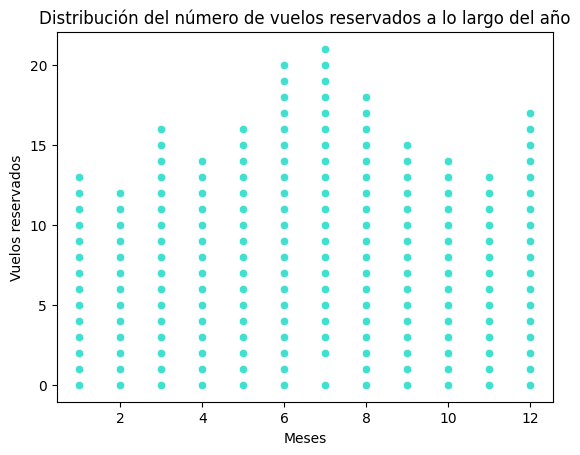

In [66]:
# Creo una gráfica básica usando 'sns.scatterplot()' que es adecuada para revisar la distribución de una variable numérica en función de otra variable 
# también numérica.
sns.scatterplot(x = "Month", 
                y = "Flights Booked",
                color='#40E0D0', 
                data = df_union_clean)

# Cambio los nombres de los ejes
plt.xlabel("Meses")
plt.ylabel("Vuelos reservados");

# Añado un título a la gráfica
plt.title("Distribución del número de vuelos reservados a lo largo del año");



##### Como era de esperar, los meses con mayor número de reservas son en verano, entre junio y agosto. Sin embargo la diferencia con el resto del año no es muy grande 

##### *2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por les clientes?*

Creo una gráfica básica usando 'sns.regplot()' para evaluar la relación que existe entre dos variables numéricas y si existe una correlación lineal entre ellas pues en principio considero que así será.


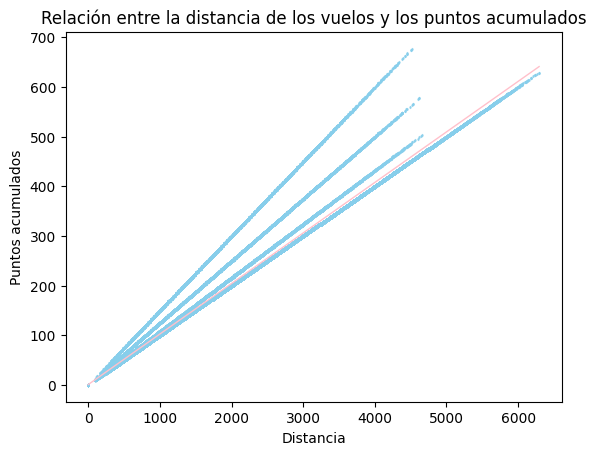

In [73]:
# Creo la gráfica
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_union_clean, 
            marker = "d",
            line_kws = {"color": "pink", "linewidth": 1}, # cambio el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "skyblue", "s": 1}) # cambio el color y el tamaño de los puntos del scaterplot          


# Cambio los nombres de los ejes
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")

# Pongo título a la gráfica
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados");

##### Confirmo viendo los datos que, a mayor distancia recorrida, mayor acumulación de puntos. Observo también que la línea de tendencia marca el recorrido de los datos. Sin duda hay una realación entre dichas variables.

##### *3. ¿Cuál es la distribución de los clientes por provincia o estado?*

En este caso no vamos a comparar variables, si no analizar la distribución de clientes en función de la variable 'Province', la cual es categorica. Por ello usamos un gráfico de barras con '.countplot()'

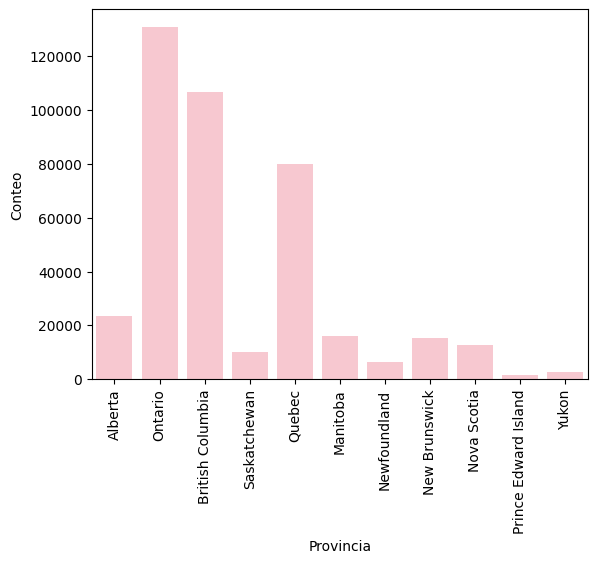

In [74]:
# Creo la gráfica
sns.countplot(x = 'Province', 
              data = df_union_clean,
              color = 'pink')

# Giro las etiquetas del eje "x" a 90º con el parámetro 'rotation', 
plt.xticks(rotation = 90)

# Cambio el nombre de los ejes 
plt.xlabel('Provincia')
plt.ylabel('Conteo');


##### Podemos observar que hay una gran diferencia entre las tres provincias con más clientes y el resto. Las provincias más comunes son Ontario, British Columbia y Quebec <3. Esto puede ser debido a que son las provincias más pobladas.

##### *4 . ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?*

Para hacer este cálculo, si los datos fueran homogéneos, utilizaría una gráfica 'Barplot' pero, debido a que la columna 'Salary' tiene outliers (algunos salarios son muy altos por lo que es más representativa la mediana que la media), he decidido utilizar 'Boxplot'.


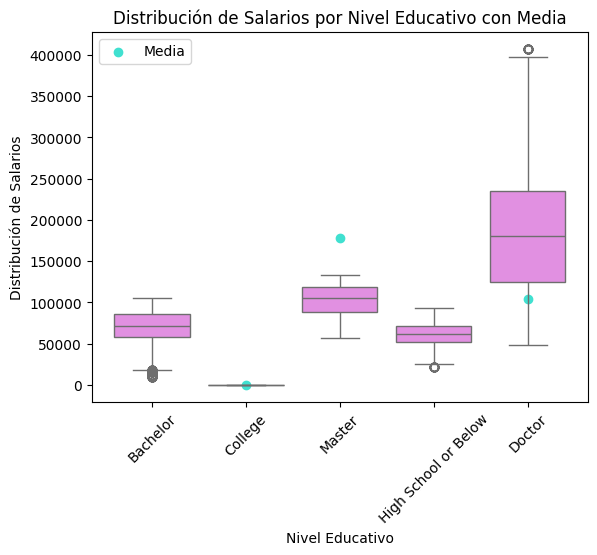

In [76]:
# Creo la gráfica
sns.boxplot(x='Education', y='Salary', data=df_union_clean, color='violet') 

# Calculo la media y la añado al el gráfico
mean_values = df_union_clean.groupby('Education')['Salary'].mean().values
plt.scatter(range(len(mean_values)), mean_values, color='turquoise', label='Media', marker='o')

# Personalizo el gráfico
plt.xlabel('Nivel Educativo')
plt.ylabel('Distribución de Salarios')
plt.title('Distribución de Salarios por Nivel Educativo con Media')
plt.legend()  # Añado una leyenda para la media
plt.xticks(rotation=45)
plt.show()

Podemos apreciar que hay relación entre ambas variables ya que, a mayor nivel de estudios alcanzados, mayor es el salario percibido. Observamos también que, debido a los outliers de la variable 'Salary', la media se ve afectada por ellos y no es representativa del grupo, es decir, no es adecuada para describir el valor típico del conjunto de datos. 

##### *5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?*

En este caso, la gráfica adecuada para la visualización es el 'Pieplot'. Esta vez usaré la librería Matplotlib pues en Seaborn no tenemos este tipo de gráfico.

In [77]:
# Antes de nada, recordemos los valores únicos de 'Loyalty Card'
print(f'Las opciones de la variable Loyalty card son: {df_loyalty["Loyalty Card"].unique()}.')


Las opciones de la variable Loyalty card son: ['Star' 'Aurora' 'Nova'].


In [78]:
# Preparo los datos para poder hacer el pieplot usando un groupby. En este caso tengo que contar el número de clientes que hay por nivel educativo
df_loyalty_group = df_union_clean.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
df_loyalty_group


,Loyalty Card,Loyalty Number
0,Aurora,83832
1,Nova,137568
2,Star,184224


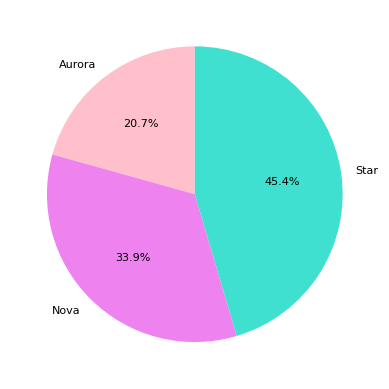

In [79]:
# Creo una lista para definir los colores que deseo en cada una de las categorías. Debe tener tantos elementos como categorías tiene la columna
colores = ["pink", "violet", "turquoise"]


# Creo el gráfico 
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_loyalty_group, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

Como podemos observar, el tipo de tarjeta más común entre les clientes es 'Star', seguido de 'Nova' y en último lugar, con menos de la mitad de clientes que 'Star', encontramos la tarjeta 'Aurora'.

##### *¿Cómo se distribuyen los clientes según su estado civil y género?*

En este caso uso nuevamente un gráfico de barras. Deseo usar la paleta 'pastel' para los colores. Si no los defino se ponen por defecto, por lo que antes de crear el gráfico, haré la selección.


In [431]:
# Primero recordemos los valores únicos de 'Marital Status' y 'Gender'
print(f'Las opciones de la variable Marital Status card son: {df_loyalty["Marital Status"].unique()}.')
print(f'Las opciones de la variable Gender card son: {df_loyalty["Gender"].unique()}.')

Las opciones de la variable Marital Status card son: ['Married' 'Divorced' 'Single'].
Las opciones de la variable Gender card son: ['Female' 'Male'].


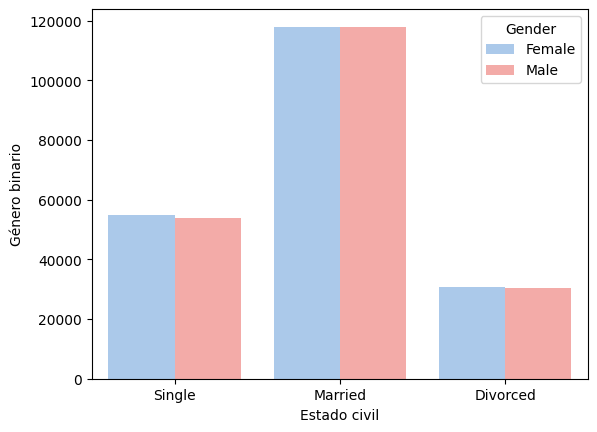

In [83]:
# Elegir colores específicos de la paleta "pastel"
pastel_colors = sns.color_palette("pastel")

# Supongamos que quieres usar el primer y el segundo color
color1 = pastel_colors[0]  
color2 = pastel_colors[3]  


# Creo el gráfico
sns.countplot(x = 'Marital Status',
              hue = 'Gender',
              data = df_union_clean,
              palette = [color1, color2],
              order = ['Single', 'Married', 'Divorced'])

# Cambio el nombre de los ejes 
plt.xlabel("Estado civil")
plt.ylabel("Género binario");

Como podemos observar, no hay diferencias estadísticamente significativas en el estado civil en función del género.